# Training

In [450]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

In [451]:
df = pd.read_csv("UFC_limpio.csv")
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender,year
0,Marina Rodriguez,Amanda Lemos,Jason Herzog,2022-11-05,"Las Vegas, Nevada, USA",Blue,False,Women's Strawweight,0.265625,0.000000,0.514219,0.441719,0.031250,0.267500,0.507812,0.250,0.50,0.125,41.187500,21.234375,47.18750,23.179688,44.234375,23.875000,55.671875,30.804688,0.421875,0.046875,2.140625,0.625000,29.695312,12.742188,24.718750,7.804688,5.9375,3.562500,9.031250,6.500000,5.554688,4.929688,13.437500,8.875000,36.375000,18.203125,42.945312,19.515625,1.757812,1.273438,3.226562,2.656250,3.054688,1.757812,1.015625,1.007812,393.281250,14,0,0,1,5,6,2,0,0.0,1.0,1.0,2.0,2.0,0.0,Southpaw,162.56,165.10,115.0,0.066406,0.000000,0.418438,0.383984,0.001953,0.397969,0.257812,0.285156,0.007812,0.250000,214.460938,92.039062,142.210938,54.640625,224.929688,101.468750,164.539062,74.082031,0.035156,0.007812,5.109375,1.648438,160.546875,51.476562,113.746094,36.472656,30.175781,23.074219,12.742188,8.359375,23.738281,17.488281,15.722656,9.808594,193.824219,75.921875,125.949219,43.445312,18.925781,14.843750,8.242188,5.492188,1.710938,1.273438,8.019531,5.703125,1090.875000,30,0,0,1,4,6,3,0,0.0,1.0,4.0,1.0,0.0,0.0,Orthodox,167.64,165.10,115.0,35.0,35.0,Women's,2022
1,Darrick Minner,Shayilan Nuerdanbieke,Mark Smith,2022-11-05,"Las Vegas, Nevada, USA",Blue,False,Featherweight,0.500000,0.000000,0.445000,0.490000,0.410000,0.500000,0.000000,2.250,1.50,1.500,67.500000,32.000000,89.50000,43.000000,125.750000,76.500000,116.500000,63.000000,8.500000,3.000000,1.750000,1.000000,59

In [452]:
df.drop(df[df['Winner'] == 'Draw'].index, inplace=True)

In [453]:
df_num = df.select_dtypes(include=[float, int])
scaler = StandardScaler()
df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

In [454]:
UFC = pd.get_dummies(pd.get_dummies(df.drop(columns=['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'year']), columns=['gender'], drop_first=True), columns=['weight_class', 'R_Stance', 'B_Stance'])
UFC.sample(5)

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender_Women's,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
2728,Blue,False,-0.695478,-0.558204,-0.924598,-0.850199,-1.085506,-0.203914,-0.646295,-0.603417,2.765068,-0.429151,1.432120,0.319282,1.421436,0.977741,1.194645,0.100773,1.403757,0.860191,-0.462370,-0.841154,0.217042,-0.023099,1.835041,0.785795,1.749575,1.518500,-0.037371,-0.505947,0.655504,0.589803,-0.478402,-0.341170,-0.803513,-0.894934,1.437940,0.480409,1.421675,1.184200,0.046396,-0.621041,1.268497,0.457380,0.293293,0.165887,-0.724693,-0.717147,1.051510,-0.631569,-0.270216,-0.782738,1.919957,-1.276639,-1.062033,-0.121869,0.0,-0.147855,-0.534613,-0.819427,-0.718985,-0.579467,-0.211533,-1.213213,-1.679701,-0.882834,-0.722688,0.985179,0.261168,0.449577,-0.482120,-1.049961,0.627784,-0.631134,-0.443799,1.301230,0.101252,0.479357,0.477452,0.508152,0.160727,0.532387,0.298578,0.170580,-0.337025,-0.515719,-1.112328,-0.897740,0.011386,0.361887,0.488260,0.485064,0.874796,1.078880,-0.022386,-0.036766,-0.386131,-0.231383,0.616711,0.750762,0.103729,0.452989,0.473509,0.515371,0.868878,1.014055,0.941881,0.930721,-0.661538,-0.5

In [455]:
X = UFC.drop(columns=['Winner'])
y = UFC.Winner

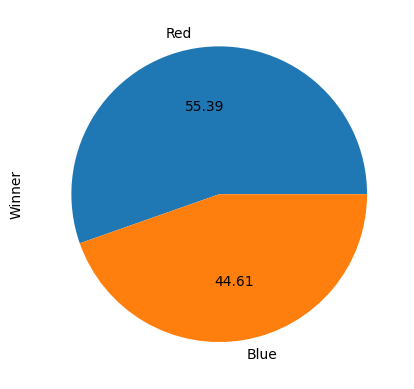

In [456]:
over_sampler = ADASYN()
X_res, y_res = over_sampler.fit_resample(X,y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')

In [457]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Decision Tree

In [458]:
from sklearn.tree import DecisionTreeClassifier 

dtmodel = DecisionTreeClassifier(random_state=1, max_depth=5, criterion="gini")

In [459]:
dtmodel.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5, random_state=1)

In [460]:
y_pred_classDT = dtmodel.predict(X_test)

In [461]:
cnf_matrixDT = metrics.confusion_matrix(y_test, y_pred_classDT) 
cnf_matrixDT

array([[150, 303],
       [124, 429]], dtype=int64)

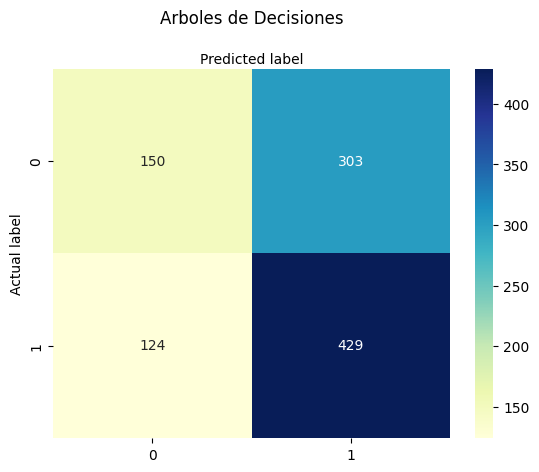

In [462]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixDT), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('Arboles de Decisiones', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')
plt.show()

In [463]:
print(classification_report(y_test, y_pred_classDT, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.55      0.33      0.41       453
         Red       0.59      0.78      0.67       553

    accuracy                           0.58      1006
   macro avg       0.57      0.55      0.54      1006
weighted avg       0.57      0.58      0.55      1006



# Logistic Regresssion

In [464]:
# UFC = UFC[UFC['Winner'].isin(['Red', 'Blue'])]
# X = UFC.drop(columns=['Winner'])
# y = UFC.Winner

In [465]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [466]:
y_pred_classLR = logreg.predict(X_test)

In [467]:
cnf_matrixLR = metrics.confusion_matrix(y_test, y_pred_classLR) 
cnf_matrixLR

array([[166, 287],
       [143, 410]], dtype=int64)

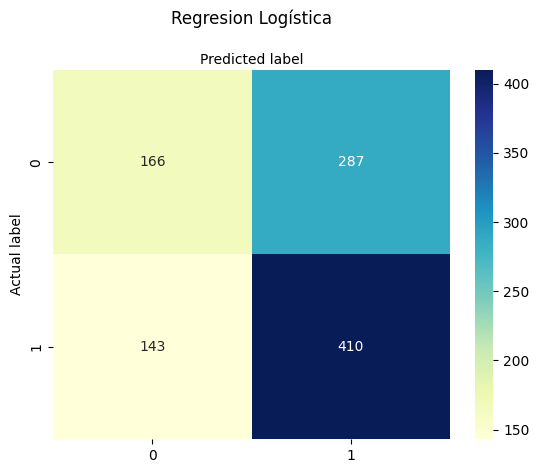

In [468]:
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixLR), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('Regresion Logística', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')
plt.show()

In [469]:
print(classification_report(y_test, y_pred_classLR, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.54      0.37      0.44       453
         Red       0.59      0.74      0.66       553

    accuracy                           0.57      1006
   macro avg       0.56      0.55      0.55      1006
weighted avg       0.57      0.57      0.56      1006



# K-Nearest Neighbors

In [470]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [471]:
y_pred_classKN = knn.predict(X_test)

In [472]:
cnf_matrixKN = metrics.confusion_matrix(y_test, y_pred_classKN) 
cnf_matrixKN

array([[176, 277],
       [181, 372]], dtype=int64)

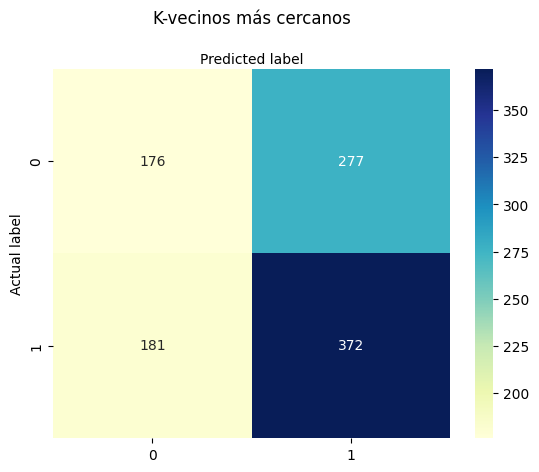

In [473]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixKN), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('K-vecinos más cercanos', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')
plt.show()

In [474]:
print(classification_report(y_test, y_pred_classKN, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.49      0.39      0.43       453
         Red       0.57      0.67      0.62       553

    accuracy                           0.54      1006
   macro avg       0.53      0.53      0.53      1006
weighted avg       0.54      0.54      0.54      1006



# Support Vector Classifier

In [475]:
# from sklearn.svm import SVC
# svcmodel= SVC(C = 3, kernel = 'linear', random_state=1)
# svcmodel.fit(X_train, y_train)

In [476]:
# y_pred_classSV = svcmodel.predict(X_test)

In [477]:
# cnf_matrixSV = metrics.confusion_matrix(y_test, y_pred_classSV) 
# cnf_matrixSV

In [478]:
# class_names=[0,1]
# fig, ax = plt.subplots() 
# tick_marks = np.arange(len(class_names)) 
# plt.xticks(tick_marks, class_names) 
# plt.yticks(tick_marks, class_names) 

# sns.heatmap(pd.DataFrame(cnf_matrixSV), annot=True, cmap="YlGnBu" ,fmt='g') 
# ax.xaxis.set_label_position("top")
# plt.title('SVC', y=1.1) 
# plt.ylabel('Actual label') 
# plt.xlabel('Predicted label')
# plt.show()

In [479]:
# print(classification_report(y_test, y_pred_classSV, zero_division = 0))

# Neural Network

In [480]:
from sklearn.neural_network import MLPClassifier
RNmodel = MLPClassifier(solver='lbfgs', max_iter=100, alpha=1e-5,hidden_layer_sizes=(4, 5), random_state=1)
RNmodel.fit(X_train, y_train) 

C:\Users\Gustavo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 5), max_iter=100,
              random_state=1, solver='lbfgs')

In [481]:
y_pred_classRN = RNmodel.predict(X_test)
y_pred_classRN

array(['Red', 'Blue', 'Red', ..., 'Blue', 'Red', 'Red'], dtype='<U4')

In [482]:
cnf_matrixRN = metrics.confusion_matrix(y_test, y_pred_classRN) 
cnf_matrixRN 

array([[158, 295],
       [151, 402]], dtype=int64)

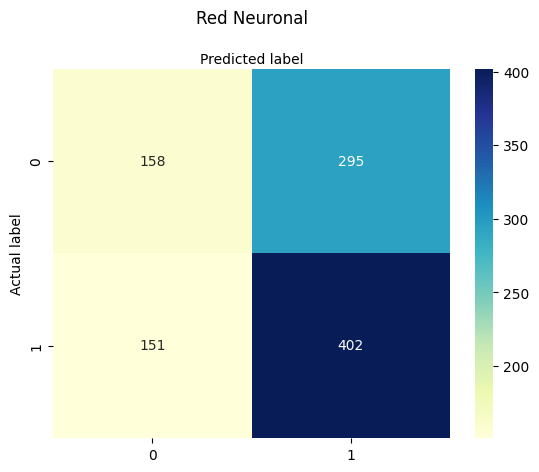

In [483]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixRN), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('Red Neuronal', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')
plt.show()

In [484]:
print(classification_report(y_test, y_pred_classRN, zero_division = 0))

              precision    recall  f1-score   support

        Blue       0.51      0.35      0.41       453
         Red       0.58      0.73      0.64       553

    accuracy                           0.56      1006
   macro avg       0.54      0.54      0.53      1006
weighted avg       0.55      0.56      0.54      1006



# XG Boost

In [485]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
UFC_c = UFC
UFC_c['Winner'] = label_encoder.fit_transform(UFC_c['Winner'])
X_c = UFC_c.drop(columns=['Winner'])
y_c = UFC_c.Winner
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, random_state=1)

In [486]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate =0.1, n_estimators=244, max_depth=4,
                     min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                     objective= 'binary:logistic', reg_alpha= 0, scale_pos_weight=0.8)
xgb_model.fit(X_train_c, y_train_c)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=244, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [487]:
y_pred_classXG = xgb_model.predict(X_test_c)

In [488]:
cnf_matrixXG = metrics.confusion_matrix(y_test_c, y_pred_classXG) 
cnf_matrixXG

array([[194, 259],
       [189, 364]], dtype=int64)

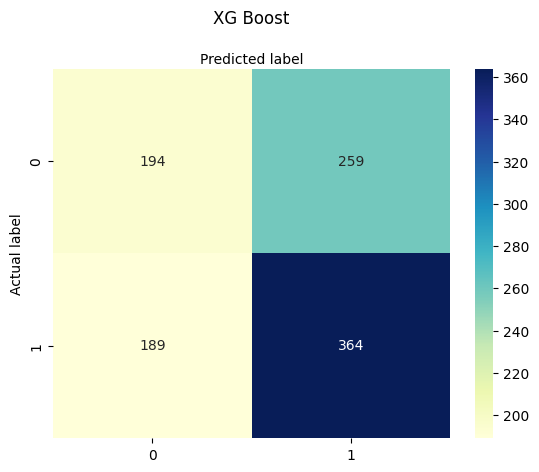

In [489]:
class_names=[0,1,2]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrixXG), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.title('XG Boost', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')
plt.show()

In [490]:
print(classification_report(y_test_c, y_pred_classXG, zero_division = 0))

              precision    recall  f1-score   support

           0       0.51      0.43      0.46       453
           1       0.58      0.66      0.62       553

    accuracy                           0.55      1006
   macro avg       0.55      0.54      0.54      1006
weighted avg       0.55      0.55      0.55      1006



In [491]:
roster = pd.read_csv('PronosticoUFC.csv')
roster = roster.iloc[:, 1:9]
roster = roster.drop(columns=['Referee'])
roster.head()


,R_fighter,B_fighter,date,location,Winner,title_bout,weight_class
0,Israel Adesanya,Alex Pereira,12-nov-22,"New York City, New York, USA",NaN,True,Middleweight
1,Carla Esparza,Zhang Weili,12-nov-22,"New York City, New York, USA",NaN,True,Women's Strawweight
2,Dustin Poirier,Michael Chandler,12-nov-22,"New York City, New York, USA",NaN,False,Lightweight
3,Frankie Edgar,Chris Gutierrez,12-nov-22,"New York City, New York, USA",NaN,False,Featherweight
4,Dan Hooker,Claudio Puelles,12-nov-22,"New York City, New York, USA",NaN,False,Lightweight


In [492]:
names = []
for fighter in roster.R_fighter:
    names.append(fighter)
for fighter in roster.B_fighter:
    names.append(fighter)
print(names)

['Israel Adesanya', 'Carla Esparza', 'Dustin Poirier', 'Frankie Edgar', 'Dan Hooker', 'Brad Riddell', 'Dominick Reyes', 'Erin Blanchfield', 'Andre Petroski', 'Karolina Kowalkiewicz', 'Michael Trizano', 'Matt Frevola', 'Julio Arce', 'Carlos Ulberg', 'Alex Pereira', 'Zhang Weili', 'Michael Chandler', 'Chris Gutierrez', 'Claudio Puelles', 'Renato Moicano', 'Ryan Spann', 'Molly McCann', 'Wellington Turman', 'Silvana Gomez Juarez', 'SeungWoo Choi', 'Ottman Azaitar', 'Montel Jackson', 'Nicolae Negumereanu']


In [493]:
fighters = pd.DataFrame(columns = df.columns)
d_frames = [fighters]
for fighter in names:
    d_frames.append(df[(df['R_fighter'] == fighter) | (df['B_fighter'] == fighter)].iloc[[0]])
fighters = pd.concat(d_frames)

In [494]:
R_cols = []
B_cols = []
for col in df.columns:
    if col.startswith('R_'):
        R_cols.append(col)
    elif col.startswith('B_'):
        B_cols.append(col)

In [495]:
R_fighters = fighters[fighters['R_fighter'].isin(names)][R_cols]
B_fighters = fighters[fighters['B_fighter'].isin(names)][B_cols]

In [496]:
for col in R_fighters.columns:
    R_fighters.rename(columns={col:col[2:]}, inplace=True)
for col in B_fighters.columns:
    B_fighters.rename(columns={col:col[2:]}, inplace=True)
fighters = pd.concat([R_fighters, B_fighters])
fighters.head()

,fighter,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,avg_opp_TD_pct,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,avg_opp_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_TD_att,avg_TD_landed,avg_opp_TD_att,avg_opp_TD_landed,avg_HEAD_att,avg_HEAD_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_BODY_att,avg_BODY_landed,avg_opp_BODY_att,avg_opp_BODY_landed,avg_LEG_att,avg_LEG_landed,avg_opp_LEG_att,avg_opp_LEG_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_GROUND_att,avg_GROUND_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,total_time_fought(seconds),total_rounds_fought,total_title_bouts,current_win_streak,current_lose_streak,longest_win_streak,wins,losses,draw,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height_cms,Reach_cms,Weight_lbs,age
150,Israel Adesanya,1.088496,-0.629703,0.270525,-0.136936,-1.165942,0.483860,-0.659034,-0.631134,1.230454,-0.421768,1.330350,1.612784,1.083285,1.000345,1.190993,1.241093,1.154397,1.090747,-1.021483,-0.908584,2.482508,2.174437,0.769380,0.605147,1.109243,0.973093,0.969438,0.702315,0.165794,0.426183,3.631630,3.873214,1.129428,0.886912,1.567742,2.052385,1.272592,1.290265,-0.501656,-0.322603,-0.506119,-0.340066,-0.683885,-0.693022,-0.512590,-0.430278,2.870107,1.480173,3.791793,3.896758,-0.638402,2.789544,1.378451,-0.713378,0.0,-0.180658,0.758700,2.122788,1.060926,-0.646248,-0.254906,Switch,1.620671,1.816247,0.540991,0.321274
417,Frankie Edgar,-0.719832,1.452012,0.833938,0.235391,-0.873053,-1.049922,-0.673538,-0.608217,-0.430716,-0.449117,0.489488,0.187616,0.703763,0.909556,0.109614,-0.398890,0.416467,0.317035,0.199047,-0.441371,-1.111642,-0.897725,0.598315,0.424540,0.685436,0.953266,0.366302,-0.072179,0.118327,-0.004890,-0.403690,-0.329062,0.942905,1.020045,0.762959,0.645832,0.875969,1.175806,-0.854940,-0.882239,-0.951109,-0.865236,-0.752713,-0.743990,-0.113733,0.074372,-0.459641,4.748464,4.994378,0.730330,-0.638402,0.924050,3.042783,2.744424,0.0,-0.180658,0.758700,4.159733,1.060926,0.589999,3.342398,Orthodox,-1.157464,-0.927309,-0.880382,2.248438
151,Brad Riddell,-0.543391,-0.629703,0.675118,0.543779,0.419282,-0.390925,-0.688163,-0.267598,-0.234518,1.082437,0.650589,1.127677,0.735117,1.052182,0.457518,0.670499,0.442457,0.415622,0.905071,0.662877,0.429741,0.293033,0.421805,0.808287,0.569282,0.851189,1.313470,1.343613,1.334309,1.659659,0.560809,0.805291,0.452459,0.154566,0.818609,1.445587,0.938262,1.405419,-0.652617,-0.581104,-0.671697,-0.528684,-0.305605,-0.232943,-0.535818,-0.484390,0.567756,-0.279676,-0.417257,1.258068,-0.638402,0.457677,-0.285882,-0.713378,0.0,-0.180658,0.758700,0.595080,-0.834064,-0.646248,-0.254906,Orthodox,-0.879651,-0.241420,-0.311833,-0.160517
643,Dominick Reyes,-0.207208,0.985179,0.061092,0.587417,-1.133564,-0.605181,-0.674456,-0.631134,-0.443799,-0.449117,0.249239,0.254670,0.150769,0.556488,-0.088177,-0.315944,-0.137900,-0.024983,-0.950043,-0.902446,0.239995,-0.238562,-0.037440,-0.440065,-0.170589,-0.046667,0.761753,1.005605,0.464584,0.608729,1.009052,1.106024,1.675225,1.880093,0.482099,0.610081,0.327659,0.901667,-0.616693,-0.435831,-0.668298,-0.684375,-0.754566,-0.743504,-0.504209,-0.493801,0.356068,-0.153973,0.785328,2.313544,-0.638402,1.390424,0.189642,-0.329178,0.0,-0.180658,0.758700,-0.423393,0.587178,-0.028124,-0.254906,Southpaw,1.620671,1.130358,1.109541,0.080378
198,Erin Blanchfield,-0.722688,-0.629703,1.387111,-0.813842,2.709050,-1.049961,0.189135,-0.631134,-0.443799,-0.449117,0.888980,1.730233,0.026241,-0.270557,1.874115,2.719154,-0.037876,-0.340448,0.862240,3.020069,-0.726810,-0.897740,1.103951,2.280300,0.025275,-0.451008,0.118926,0.587233,-0.173972,-0.207475,-0.199848,0.003336,0.251706,0.429734,0.070479,0.297287,0.22

In [497]:
R_df = pd.DataFrame()
B_df = pd.DataFrame()
r_fighters_list = []
b_fighters_list = []

for index in range(len(roster)):
    r_fighters_list.append(fighters[fighters['fighter'] == roster['R_fighter'].iloc[index]])
    b_fighters_list.append(fighters[fighters['fighter'] == roster['B_fighter'].iloc[index]])

R_df = pd.concat(r_fighters_list)
B_df = pd.concat(b_fighters_list)

for col in R_df.columns:
    R_df.rename(columns={col:'R_' + col}, inplace=True)
for col in B_df.columns:
    B_df.rename(columns={col:'B_' + col}, inplace=True)

R_df = R_df.reset_index(drop=True)
B_df = B_df.reset_index(drop=True)

to_predict = R_df.join(B_df)
to_predict.head()

,R_fighter,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_fighter,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age
0,Israel Adesanya,1.088496,-0.629703,0.270525,-0.136936,-1.165942,0.483860,-0.659034,-0.631134,1.230454,-0.421768,1.330350,1.612784,1.083285,1.000345,1.190993,1.241093,1.154397,1.090747,-1.021483,-0.908584,2.482508,2.174437,0.769380,0.605147,1.109243,0.973093,0.969438,0.702315,0.165794,0.426183,3.631630,3.873214,1.129428,0.886912,1.567742,2.052385,1.272592,1.290265,-0.501656,-0.322603,-0.506119,-0.340066,-0.683885,-0.693022,-0.512590,-0.430278,2.870107,1.480173,3.791793,3.896758,-0.638402,2.789544,1.378451,-0.713378,0.0,-0.180658,0.758700,2.122788,1.060926,-0.646248,-0.254906,Switch,1.620671,1.816247,0.540991,0.321274,Alex Pereira,0.658705,-0.558204,1.245300,-0.850199,-1.085506,0.061822,-0.646295,-0.603417,-0.468362,-0.429151,0.223840,0.893885,-0.067894,-0.189497,0.485651,1.182614,-0.205149,-0.335774,-0.991298,-0.841154,1.705231,0.833520,-0.067881,0.448099,-0.035552,-0.057643,1.838968,2.335121,-0.234013,-0.553240,-0.271754,-0.255973,-0.004449,-0.003232,0.184377,0.836160,0.011948,0.003077,1.113725,1.413280,0.227052,-0.106389,-0.711128,-0.794208,-0.666359,-0.633730,-0.117330,-0.708342,-0.270216,0.427865,-0.716911,-0.181366,-0.500880,-1.056391,0.0,-0.147855,-0.534613,-0.192861,-0.158132,-0.579467,-0.211533,Orthodox,1.660657,1.664378,0.542887,0.987958
1,Carla Esparza,-0.695478,-0.558204,1.725035,0.285277,1.602208,-0.896511,-0.247367,-0.475332,-0.102075,-0.016138,-0.645150,-0.291172,-0.686666,-0.536139,0.995700,2.361962,-0.327175,0.130709,1.175206,1.629295,-0.873577,-0.648624,-0.459330,0.186389,-0.585343,-0.327883,-0

In [498]:
to_predict = to_predict.drop(columns=['R_fighter', 'B_fighter'])

In [499]:
roster['gender'] = np.where(roster['weight_class'].str.contains('Women'), "Women's", "Men's")
to_predict = roster.join(to_predict)

In [500]:
to_predict = pd.get_dummies(pd.get_dummies(to_predict.drop(columns=['R_fighter', 'B_fighter', 'date', 'location']), columns=['gender'], drop_first=True), columns=['weight_class', 'R_Stance', 'B_Stance'])
to_predict = to_predict.reindex(sorted(to_predict.columns), axis=1)
UFC = UFC.reindex(sorted(UFC.columns), axis=1)

In [501]:
to_predict.head()

,B_Height_cms,B_Reach_cms,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,B_Weight_lbs,B_age,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,R_Height_cms,R_Reach_cms,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,R_Weight_lbs,R_age,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_current_lose_streak,R_current_win_streak,R_draw,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,Winner,gender_Women's,title_bout,weight_class_Featherweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight
0,1.660657,1.664378,1,0,0,0.542887,0.987958,1.838968,2.335121,1.113725,1.413280,0.184377,0.836160,-0.711128,-0.794208,-0.067881,0.448099,0.658705,-0.271754,-0.255973,-0.468362,0.223840,0.893885,1.245300,-0.646295,-0.991298,-0.841154,-1.085506,0.485651,1.182614,-0.234013,-0.553240,0.227052,-0.106389,0.011948,0.003077,-0.666359,-0.633730,-0.035552,-0.057643,-0.558204,-0.004449,-0.003232,-0.429151,-0.067894,-0.189497,-0.850199,-0.603417,1.705231,0.833520,0.061822,-0.205149,-0.335774,-0.716911,0.427865,0.0,-0.181366,-1.056391,-0.708342,-0.117330,-0.270216,-0.147855,-0.534613,-0.192861,-0.158132,-0.579467,-0.211533,-0.500880,1.620671,1.816247,0,0,1,0.540991,0.321274,0.969438,0.702315,-0.501656,-0.322603,1.567742,2.052385,-0.683885,-0.693022,0.769380,0.605147,1.088496,3.631630,3.873214,1.230454,1.330350,1.612784,0.270525,-0.659034,-1.021483,-0.908584,-1.165942,1.190993,1.241093,0.165794,0.426183,-0.506119,-0.340066,1.272592,1.290265,-0.512590,-0.430278,1.109243,0.973093,-0.629703,1.129428,0.886912,-0.421768,1.083285,1.000345,-0.136936,-0.631134,2.482508,2.174437,0.483860,1.154397,1.090747,-0.638402,3.896758,0.0,2.789544,-0.713378,1.480173,2.870107,3.791793,-0.180658,0.758700,2.122788,1.060926,-0.646248,-0.254906,1.378451,NaN,0,True,0,0,0,1,0,0
1,-1.71

In [502]:
to_predict = to_predict.loc[:, to_predict.columns.isin(UFC.columns.tolist())]

In [503]:
label_encoder = LabelEncoder()
UFC_c = UFC.loc[:, UFC.columns.isin(to_predict.columns.tolist())]
UFC_c['Winner'] = label_encoder.fit_transform(UFC_c['Winner'])
X_c = UFC_c.drop(columns=['Winner'])
y_c = UFC_c.Winner
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, random_state=1)

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_11744\586321505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UFC_c['Winner'] = label_encoder.fit_transform(UFC_c['Winner'])


In [504]:
xgb_model = xgb.XGBClassifier(learning_rate =0.1, n_estimators=244, max_depth=4,
                     min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                     objective= 'binary:logistic', reg_alpha= 0, scale_pos_weight=0.8)
xgb_model.fit(X_train_c, y_train_c)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=244, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [505]:
prediction = xgb_model.predict(to_predict.drop(columns=['Winner']))

In [506]:
roster = roster.drop(columns=['Winner'])
roster['Predicted_Winner'] = prediction
roster['Predicted_Winner'] = np.where(roster.Predicted_Winner == 1, 'Red', 'Blue')
roster

,R_fighter,B_fighter,date,location,title_bout,weight_class,gender,Predicted_Winner
0,Israel Adesanya,Alex Pereira,12-nov-22,"New York City, New York, USA",True,Middleweight,Men's,Red
1,Carla Esparza,Zhang Weili,12-nov-22,"New York City, New York, USA",True,Women's Strawweight,Women's,Red
2,Dustin Poirier,Michael Chandler,12-nov-22,"New York City, New York, USA",False,Lightweight,Men's,Red
3,Frankie Edgar,Chris Gutierrez,12-nov-22,"New York City, New York, USA",False,Featherweight,Men's,Blue
4,Dan Hooker,Claudio Puelles,12-nov-22,"New York City, New York, USA",False,Lightweight,Men's,Blue
5,Brad Riddell,Renato Moicano,12-nov-22,"New York City, New York, USA",False,Lightweight,Men's,Red
6,Dominick Reyes,Ryan Spann,12-nov-22,"New York City, New York, USA",False,Light Heavyweight,Men's,Red
7,Erin Blanchfield,Molly McCann,12-nov-22,"New York City, New York, USA",False,Women's Flyweight,Women's,Red
8,Andre Petroski,Wellington Turman,12-nov-22,"New York City, New York, USA",False,Middleweight,Men's,Blue
9,Karolina Kowalkiewicz,Silvana Gomez Juarez,12-nov-22,"New York City, New York, USA",False,Women's Strawweight,Women's,Red


In [507]:
roster.to_csv('Predicciones_UFC.csv', index=False)